In [1]:
!pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
csv_file_path = "/Users/JuanDiego/Documents/Proyectos Julio 2023/Customer-Churn-Records.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [5]:
##### DATA CLEANING

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [7]:
df.shape

(10000, 18)

In [8]:
print(df.dtypes)

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


In [9]:
print(df.isnull().sum().sum())

0


In [10]:
df['CustomerId'].nunique()

10000

In [11]:
# Remove the 'Surname', 'RowNumber', and 'CustomerId' columns
df.drop(['Surname','RowNumber', 'CustomerId'], axis=1, inplace=True)


In [12]:
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)


In [13]:
##Observe there is no Gender_female. As i used drop_first=True it is understood that if this is not female then its a male. It is a way to avoid redundancy and multicollinearity.
print(df.dtypes)

CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Point Earned            int64
Geography_Germany       uint8
Geography_Spain         uint8
Gender_Male             uint8
Card Type_GOLD          uint8
Card Type_PLATINUM      uint8
Card Type_SILVER        uint8
dtype: object


In [14]:
## checking class imbalance of the Exited feature and plotting it
print(df['Exited'].value_counts())

0    7962
1    2038
Name: Exited, dtype: int64


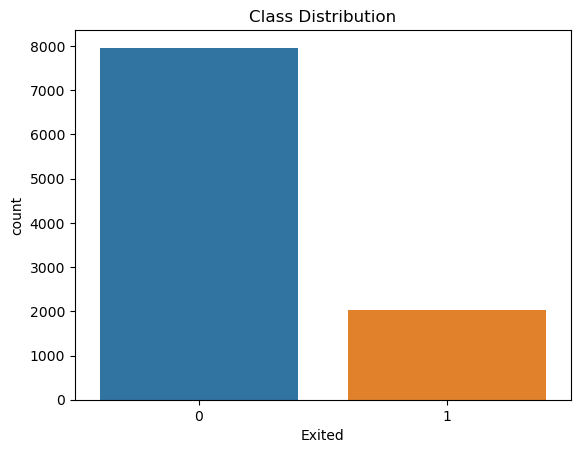

In [15]:
### it is a relation 80% to 20% prossibly a SMOTE function is needed after finishing modeling so that way we compare results.

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Exited', data=df)
plt.title('Class Distribution')
plt.show()

In [16]:
### DATA EXPLORATION

Text(0, 0.5, 'Frequency')

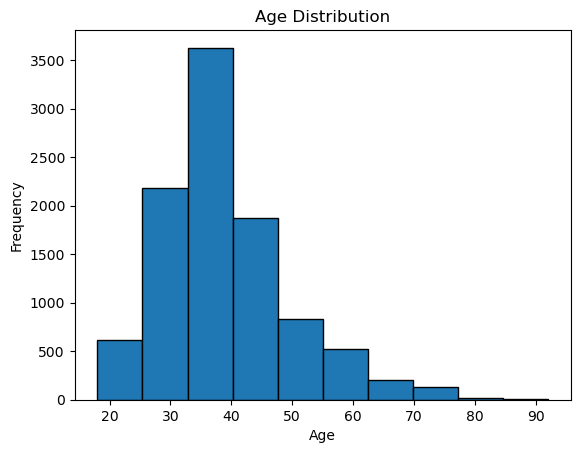

In [17]:
# creating a age plot to show age distribution
plt.hist(df['Age'], bins=10, edgecolor='black')

# adding labels and customization
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [18]:
## FREQUENCY OF AGE RANGE
# Calculate frequencies and bin edges
counts, bin_edges = np.histogram(df['Age'], bins=10)

# Create the bins (age ranges)
bins = [f'{round(bin_edges[i])} - {round(bin_edges[i+1])}' for i in range(len(bin_edges)-1)]

# Create a DataFrame
df_age_distribution = pd.DataFrame({'Age Range': bins, 'Frequency': counts})

# Display the DataFrame
print(df_age_distribution)

  Age Range  Frequency
0   18 - 25        611
1   25 - 33       2179
2   33 - 40       3629
3   40 - 48       1871
4   48 - 55        828
5   55 - 62        523
6   62 - 70        208
7   70 - 77        127
8   77 - 85         20
9   85 - 92          4


In [19]:
### FREQUENCY OF COMPLAINS BY AGE RANGE

# Calculate frequencies and bin edges
counts, bin_edges = np.histogram(df['Age'], bins=10)

# Create the bins (age ranges)
bins = [f'{round(bin_edges[i])} - {round(bin_edges[i+1])}' for i in range(len(bin_edges)-1)]

# Calculate the frequency of complains in each bin
complain_counts = [df[(df['Age'] > bin_edges[i]) & (df['Age'] <= bin_edges[i+1])]['Complain'].sum() for i in range(len(bin_edges)-1)]

# Create a DataFrame
df_age_complain = pd.DataFrame({'Age Range': bins, 'Complain Frequency': complain_counts})

# Display the DataFrame
print(df_age_complain)

  Age Range  Complain Frequency
0   18 - 25                  44
1   25 - 33                 169
2   33 - 40                 478
3   40 - 48                 564
4   48 - 55                 494
5   55 - 62                 220
6   62 - 70                  58
7   70 - 77                  14
8   77 - 85                   1
9   85 - 92                   0


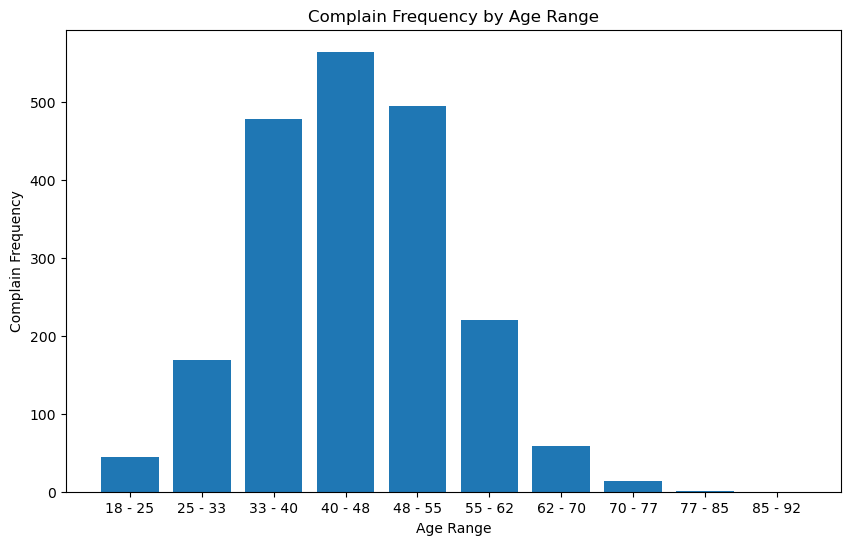

In [20]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size of the figure as needed
plt.bar(df_age_complain['Age Range'], df_age_complain['Complain Frequency'])

# Optional: Add title and labels
plt.title('Complain Frequency by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Complain Frequency')

# Display the plot
plt.show()

In [21]:
group_has_credit_card = df[df['HasCrCard'] == 1]
group_no_credit_card = df[df['HasCrCard'] == 0]

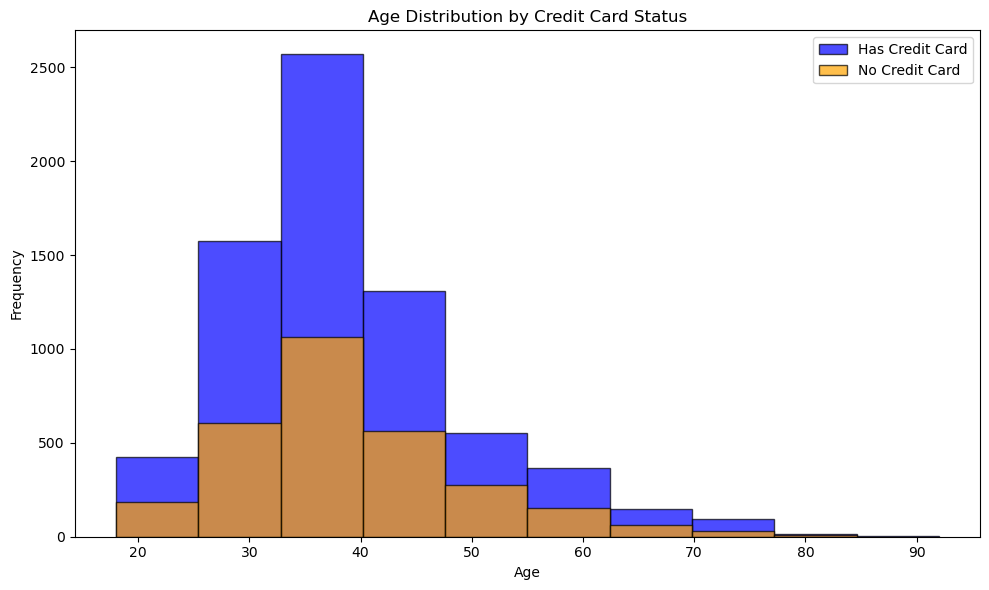

In [22]:
plt.figure(figsize=(10, 6))

# Histogram for customers with credit cards
plt.hist(group_has_credit_card['Age'], bins=10, edgecolor='black', alpha=0.7, label='Has Credit Card', color='blue')

# Histogram for customers without credit cards
plt.hist(group_no_credit_card['Age'], bins=10, edgecolor='black', alpha=0.7, label='No Credit Card', color='orange')

# Add title and labels
plt.title('Age Distribution by Credit Card Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

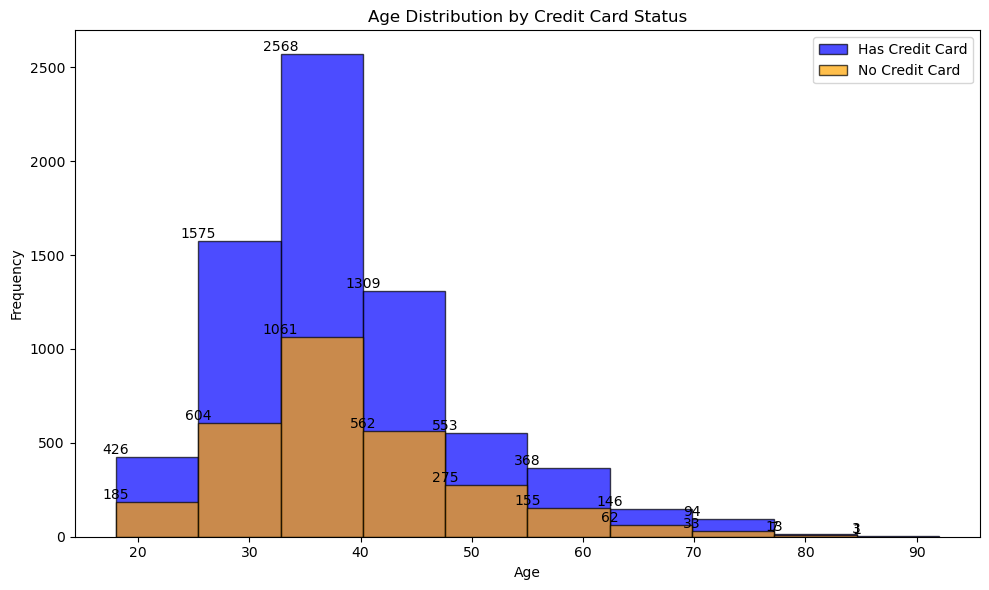

In [23]:
plt.figure(figsize=(10, 6))

# Histogram for customers with credit cards
hist1, bins1, _ = plt.hist(group_has_credit_card['Age'], bins=10, edgecolor='black', alpha=0.7, label='Has Credit Card', color='blue')

# Histogram for customers without credit cards
hist2, bins2, _ = plt.hist(group_no_credit_card['Age'], bins=10, edgecolor='black', alpha=0.7, label='No Credit Card', color='orange')

# Add exact values on each bar
for i in range(len(hist1)):
    plt.text(bins1[i], hist1[i], str(int(hist1[i])), ha='center', va='bottom', color='black')

for i in range(len(hist2)):
    plt.text(bins2[i], hist2[i], str(int(hist2[i])), ha='center', va='bottom', color='black')

# Add title and labels
plt.title('Age Distribution by Credit Card Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [24]:
print(df.columns)


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')


In [25]:
df_age_distribution.min()

Age Range    18 - 25
Frequency          4
dtype: object

In [26]:
max_age = df['Age'].max()

In [27]:
max_age = df['Age'].max()

print(max_age)




92


In [28]:
num_people_92 = (df['Age'] == 92).sum()

print(num_people_92)


2


In [29]:
min_age = df['Age'].min()

print(min_age)

18


In [30]:
num_people_18 = (df['Age'] == 18).sum()

In [31]:
print(num_people_18)

22


In [32]:
mean_age = (df['Age'].mean())

In [33]:
print(mean_age)

38.9218


Text(0, 0.5, 'Age')

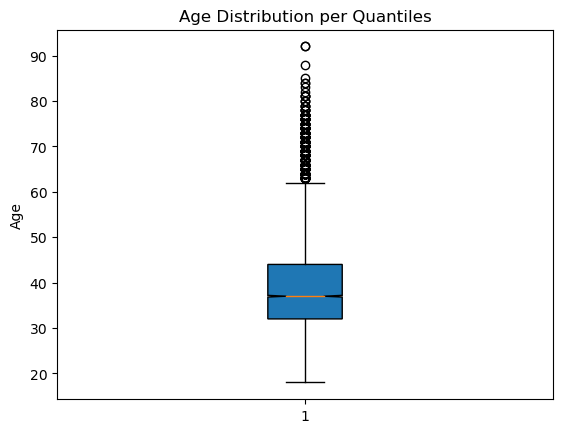

In [34]:
plt.boxplot(df['Age'], notch = True, patch_artist = True)

plt.title('Age Distribution per Quantiles')
plt.ylabel('Age')

Text(0.5, 1.0, 'Age Distribution per Gender')

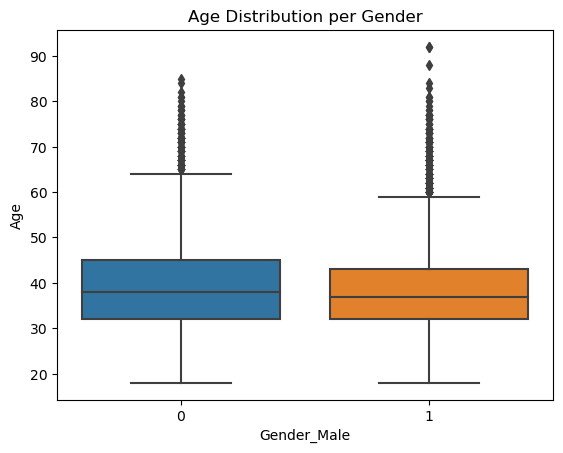

In [35]:
sns.boxplot(x= 'Gender_Male', y= 'Age', data = df)
plt.title('Age Distribution per Gender')

In [36]:
summary_boxplot_gender = df.groupby('Gender_Male')['Age'].describe()

In [37]:
print(summary_boxplot_gender)

              count       mean        std   min   25%   50%   75%   max
Gender_Male                                                            
0            4543.0  39.238389  10.588588  18.0  32.0  38.0  45.0  85.0
1            5457.0  38.658237  10.396780  18.0  32.0  37.0  43.0  92.0


In [38]:
# What is the Genre Rate (%)
percentage_male = (df['Gender_Male'].value_counts(normalize=True)[1]) * 100
percentage_female = (df['Gender_Male'].value_counts(normalize=True)[0]) * 100

# Print the percentages
print('Percentage of Males:', percentage_male)
print('Percentage of Females:', percentage_female)

Percentage of Males: 54.56999999999999
Percentage of Females: 45.43


In [39]:
num_prod_4 = (df['NumOfProducts'] == 4).sum()

In [40]:
print(num_prod_4)

60


In [41]:
num_prod_1 = (df['NumOfProducts'] == 1).sum()

In [42]:
print(num_prod_1)

5084


In [43]:
num_prod_0 = (df['NumOfProducts'] == 0).sum()

In [44]:
print(num_prod_0)

0


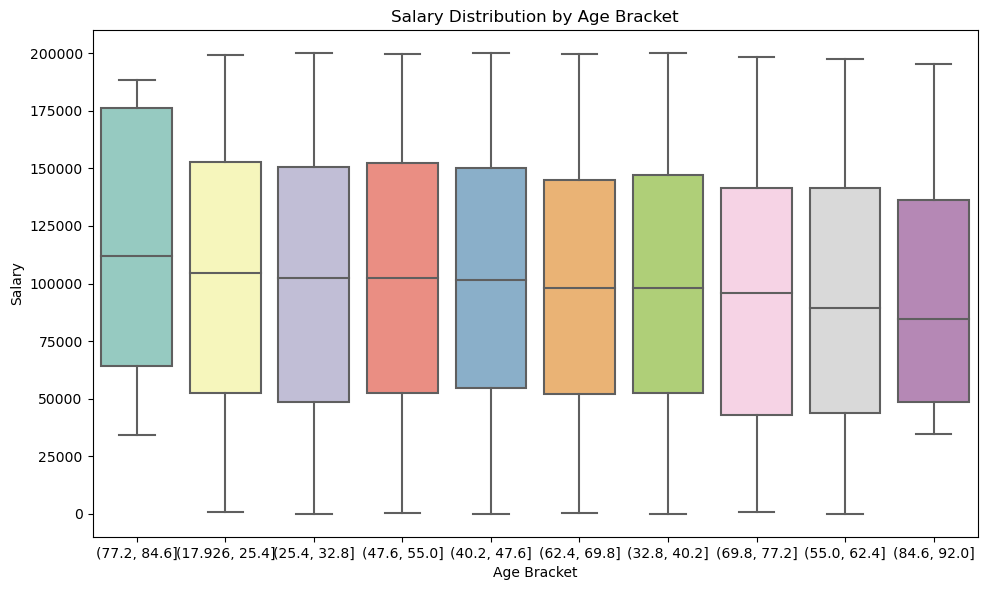

In [45]:
# Create the age brackets
bins = pd.cut(df['Age'], bins=10)

# Calculate median salary for each age bracket
df['Age Bracket'] = bins
df_median_salary = df.groupby('Age Bracket')['EstimatedSalary'].median().reset_index()
df_median_salary = df_median_salary.sort_values(by='EstimatedSalary', ascending=False)

# Sort the age brackets based on median salary in descending order
sorted_age_brackets = df_median_salary['Age Bracket']

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Bracket', y='EstimatedSalary', data=df, order=sorted_age_brackets, palette='Set3')

# Set custom x-axis labels
x_labels = [str(age) for age in sorted_age_brackets]
plt.gca().set_xticklabels(x_labels)

# Add title and labels
plt.title('Salary Distribution by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Salary')

# Show the plot
plt.tight_layout()
plt.show()



In [46]:
age_statistics = df.groupby('Age Bracket')['EstimatedSalary'].describe()

# Convert DataFrame to tibble-like format
tibble = pd.DataFrame(age_statistics.values, columns=age_statistics.columns, index=age_statistics.index) 

In [47]:
print(tibble)

                 count           mean           std       min         25%  \
Age Bracket                                                                 
(17.926, 25.4]   611.0  102093.897381  57400.435699    961.57  52325.4750   
(25.4, 32.8]    2179.0  100161.407067  58880.283808     90.07  48540.9150   
(32.8, 40.2]    3629.0   99355.838925  56835.146735     96.27  52449.6200   
(40.2, 47.6]    1871.0  101509.383538  57076.713949     11.58  54710.5550   
(47.6, 55.0]     910.0  101997.441121  58169.782359    123.07  52439.5925   
(55.0, 62.4]     441.0   94846.186463  56698.625118     91.75  43821.5600   
(62.4, 69.8]     208.0   98652.553462  56783.198460    502.70  51954.0800   
(69.8, 77.2]     127.0   93455.367953  58108.794692    705.18  43096.2650   
(77.2, 84.6]      20.0  117601.596500  58211.215102  34164.05  64243.1400   
(84.6, 92.0]       4.0   99872.755000  72842.150165  34436.83  48323.3875   

                       50%          75%        max  
Age Bracket           

In [48]:
min_salary = df['EstimatedSalary'].min()

In [49]:
print(min_salary)

11.58


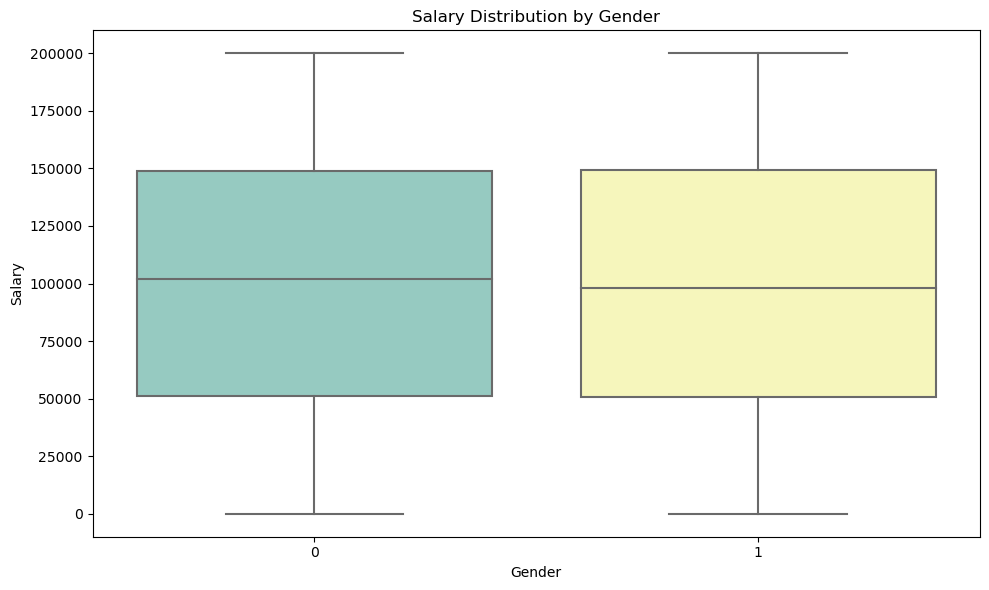

In [50]:
# Calculate median salary for each gender
df_median_salary = df.groupby('Gender_Male')['EstimatedSalary'].median().reset_index()
df_median_salary = df_median_salary.sort_values(by='EstimatedSalary', ascending=False)

# Sort the gender categories based on median salary in descending order
sorted_gender_categories = df_median_salary['Gender_Male']

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender_Male', y='EstimatedSalary', data=df, order=sorted_gender_categories, palette='Set3')

# Set custom x-axis labels
x_labels = [str(category) for category in sorted_gender_categories]
plt.gca().set_xticklabels(x_labels)

# Add title and labels
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')

# Show the plot
plt.tight_layout()
plt.show()


In [51]:
print(tibble)

                 count           mean           std       min         25%  \
Age Bracket                                                                 
(17.926, 25.4]   611.0  102093.897381  57400.435699    961.57  52325.4750   
(25.4, 32.8]    2179.0  100161.407067  58880.283808     90.07  48540.9150   
(32.8, 40.2]    3629.0   99355.838925  56835.146735     96.27  52449.6200   
(40.2, 47.6]    1871.0  101509.383538  57076.713949     11.58  54710.5550   
(47.6, 55.0]     910.0  101997.441121  58169.782359    123.07  52439.5925   
(55.0, 62.4]     441.0   94846.186463  56698.625118     91.75  43821.5600   
(62.4, 69.8]     208.0   98652.553462  56783.198460    502.70  51954.0800   
(69.8, 77.2]     127.0   93455.367953  58108.794692    705.18  43096.2650   
(77.2, 84.6]      20.0  117601.596500  58211.215102  34164.05  64243.1400   
(84.6, 92.0]       4.0   99872.755000  72842.150165  34436.83  48323.3875   

                       50%          75%        max  
Age Bracket           

In [52]:
df['HasCrCard'].count == 0

False

In [53]:
count_zero_cards = (df['HasCrCard'] == 0).sum()
print(count_zero_cards)

2945


In [54]:
count_one_card = (df['HasCrCard'] == 1).sum()
print(count_one_card)

7055


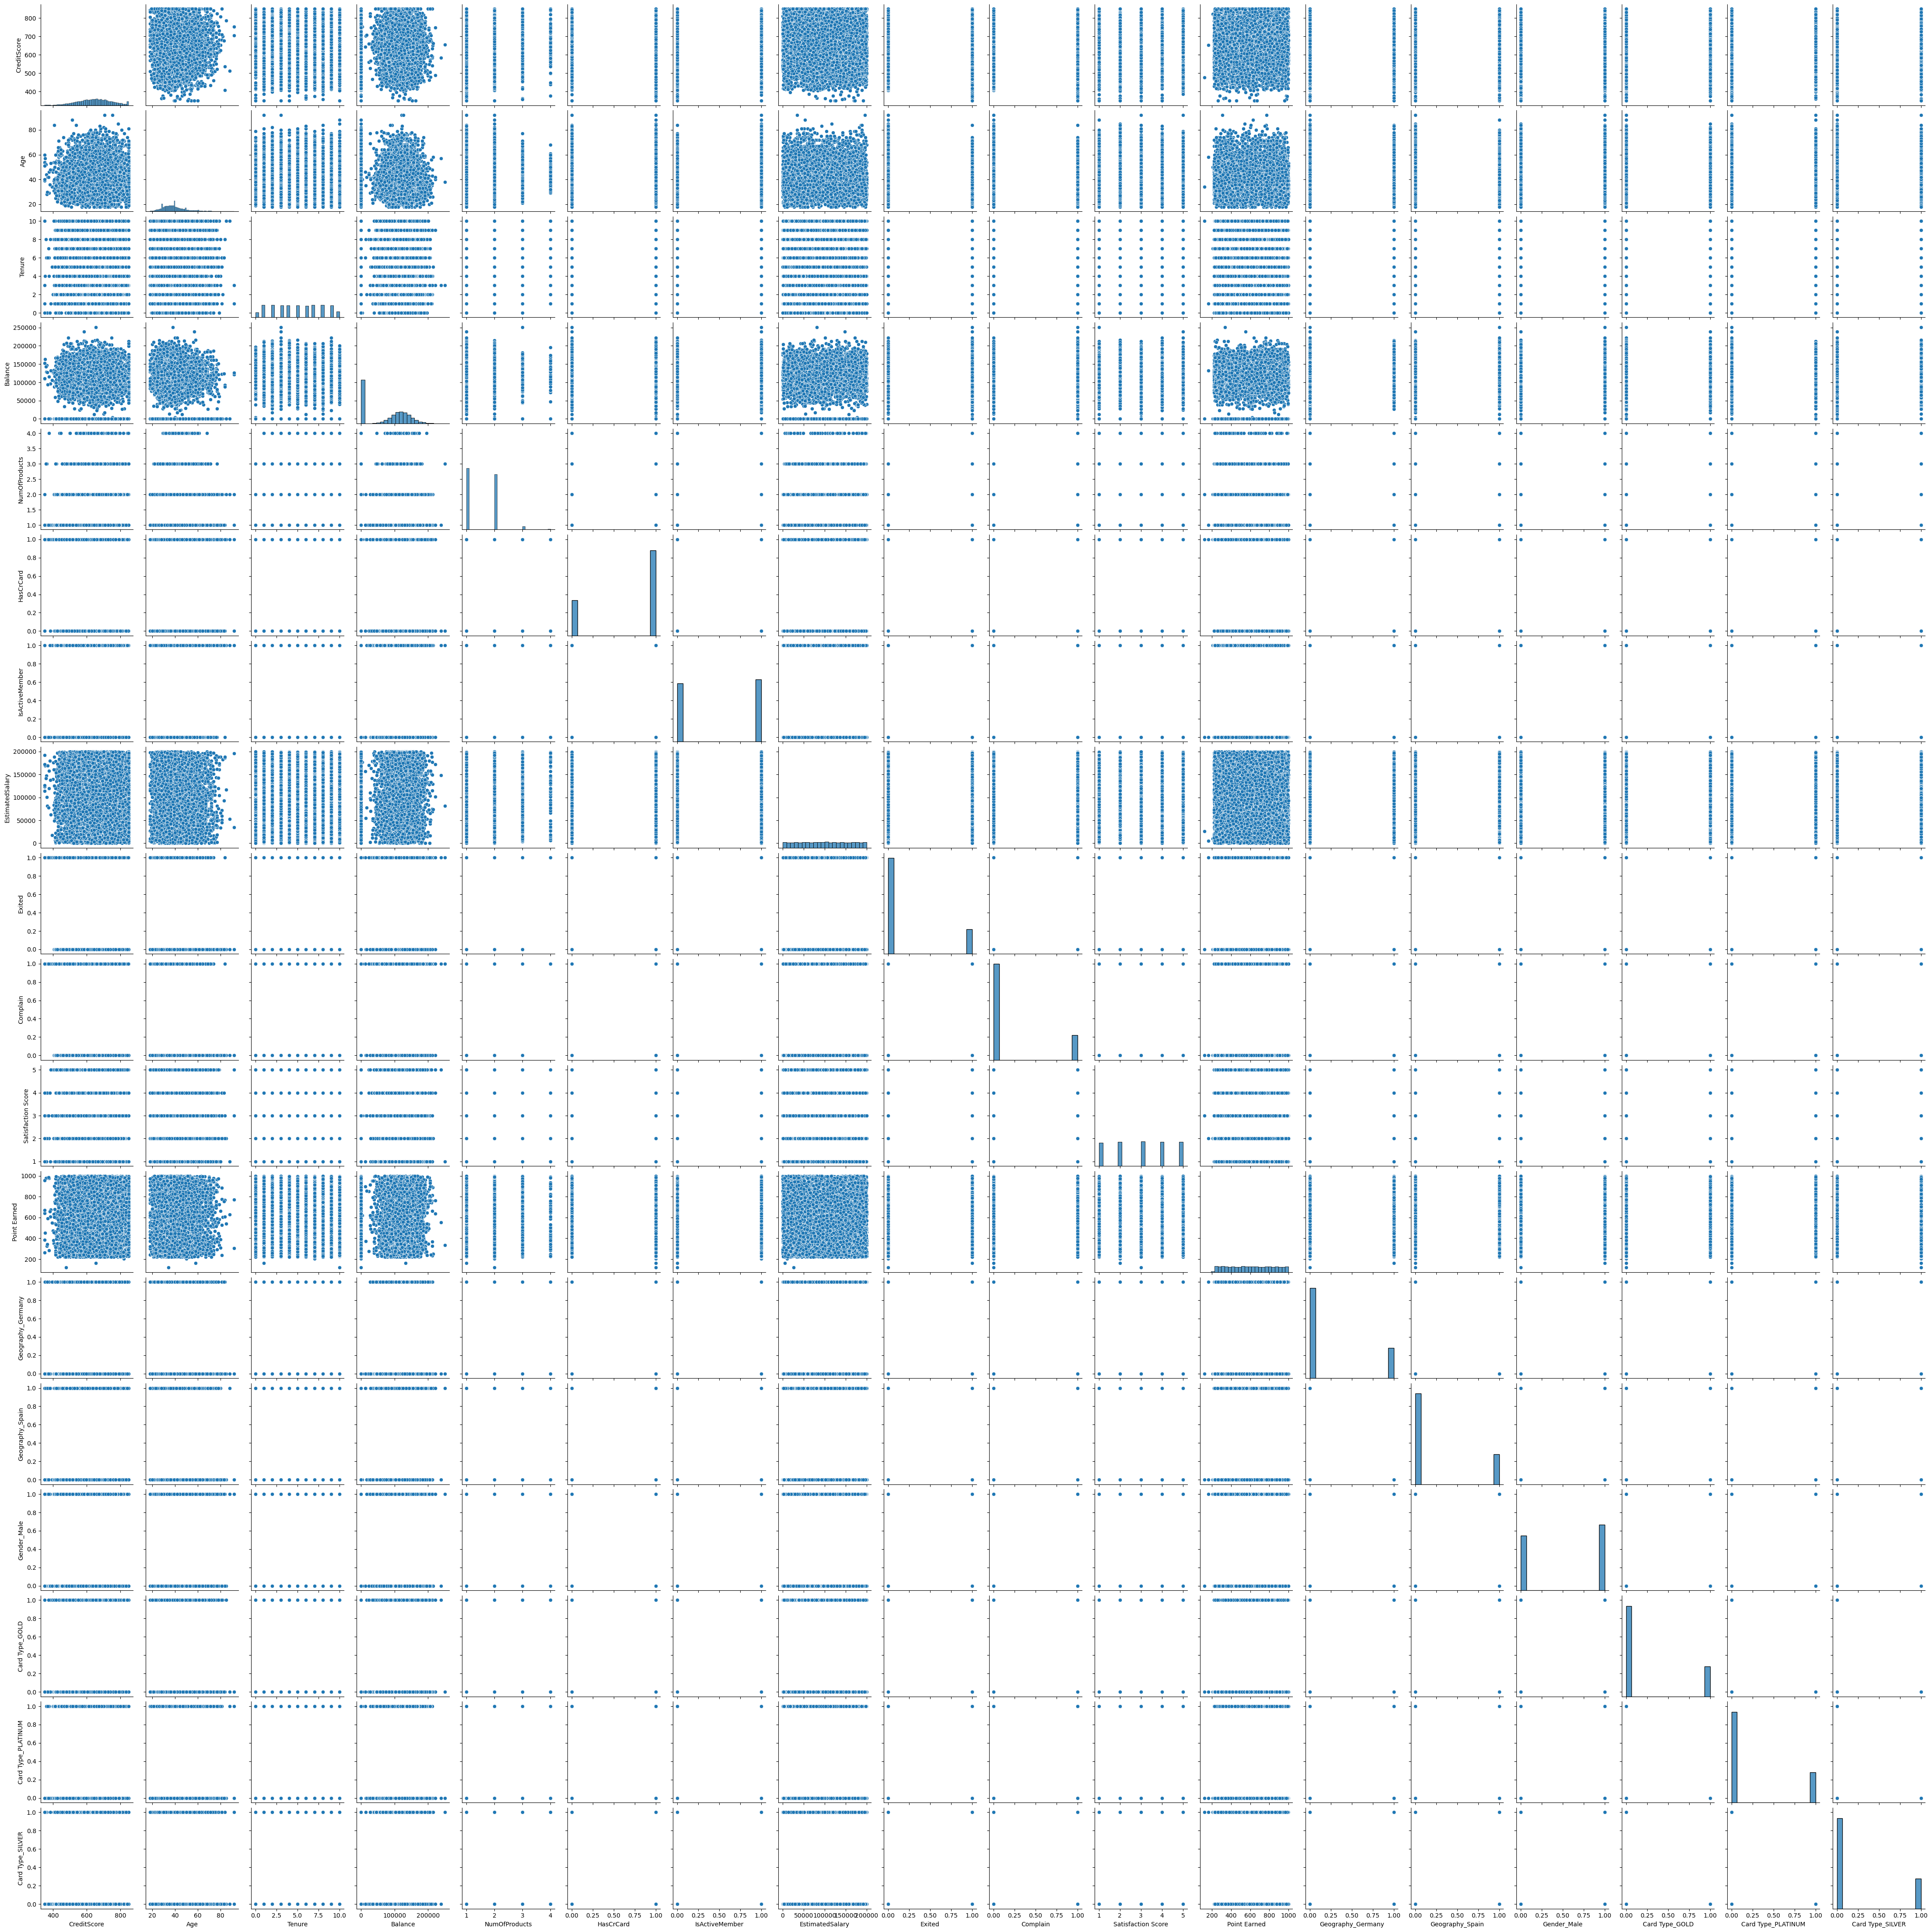

In [55]:
# Use seaborn's pairplot to generate multiple scatter plots and histograms for all columns in df
sns.pairplot(df, height=2.5)

# Show the plot
plt.show()

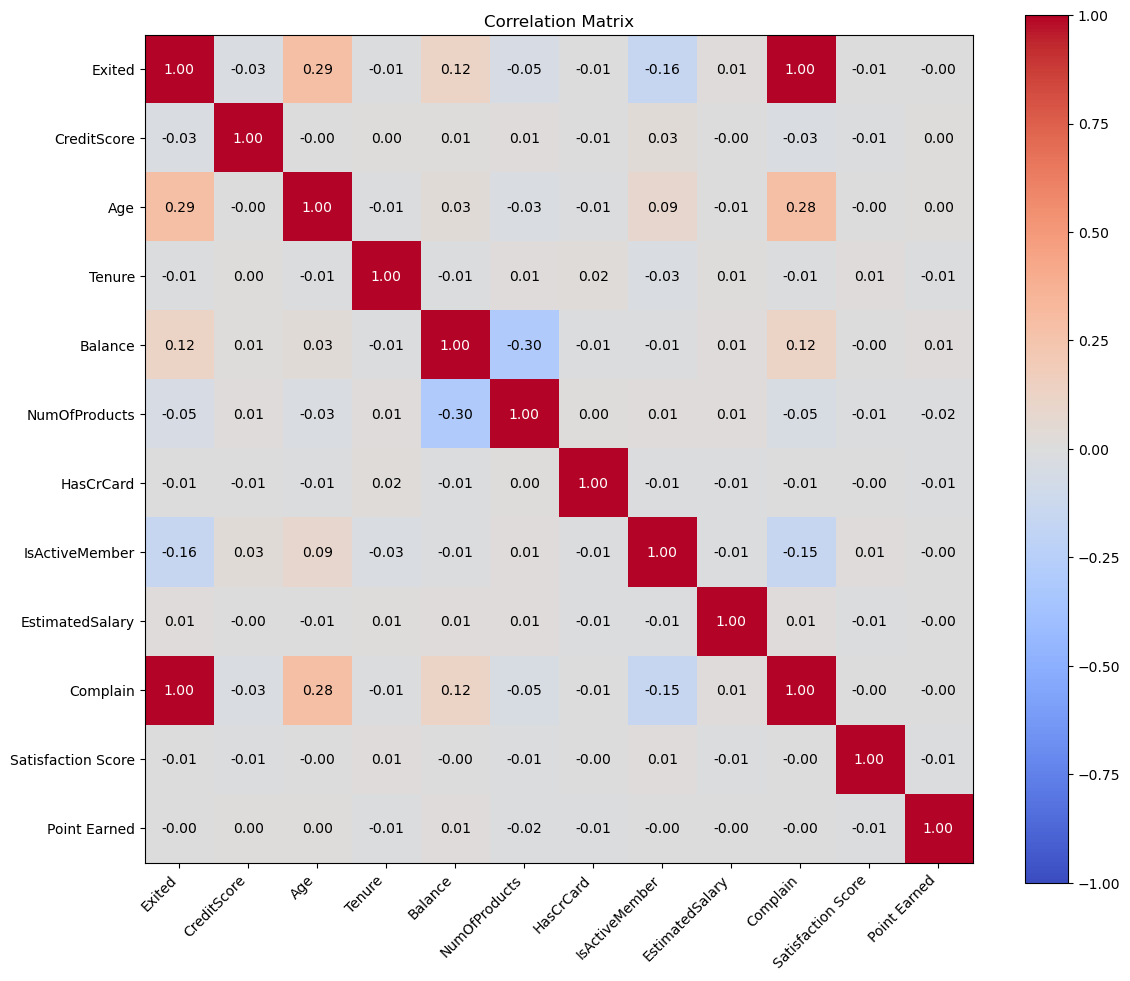

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Given list
numeric_cols = ['Exited','CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']

# Calculate the correlation matrix for the numeric columns in 'df'
correlation_matrix = df[numeric_cols].corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Apply a style to the correlation matrix
im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Add a color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the ticks and labels
ax.set_xticks(range(len(numeric_cols)))
ax.set_yticks(range(len(numeric_cols)))
ax.set_xticklabels(numeric_cols, rotation=45, ha='right')
ax.set_yticklabels(numeric_cols)

# Show the correlation values in each cell
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black' if abs(correlation_matrix.iloc[i, j]) < 0.5 else 'white')

# Set the title and show the plot
ax.set_title("Correlation Matrix")
plt.tight_layout()
plt.show()



In [57]:
## the perfect correlation between complain and exited deserves a closer look:

print(df['Exited'].value_counts())
print(df['Complain'].value_counts())


0    7962
1    2038
Name: Exited, dtype: int64
0    7956
1    2044
Name: Complain, dtype: int64


In [58]:
### values look extremely close
## another approach is doing cross-tab

print(pd.crosstab(df['Exited'], df['Complain']))

Complain     0     1
Exited              
0         7952    10
1            4  2034


Chi2 value: 9907.907035880155, p-value: 0.0


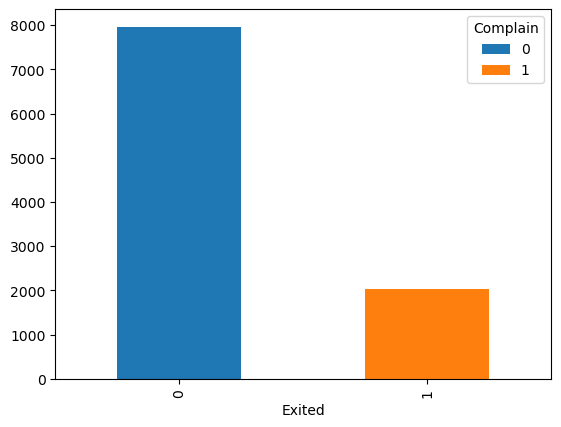

In [59]:
### more on complain vs exited: 

from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['Exited'], df['Complain']))
print(f"Chi2 value: {chi2}, p-value: {p}")

pd.crosstab(df['Exited'], df['Complain']).plot(kind='bar', stacked=True)
plt.show()

In [60]:
### HAVING MADE THE FEATURE ENGINEERING STEP I COULD BE CERTAIN THAT THE FEATURES I WANT TO USE FOR MODELING ARE: COMPLAIN, AGE, ISACTIVE MEMBER, BALANCE AND NUM OF PRODUCTS.
## FOR THE FINAL EDA I WANT TO RUN A CODE FOR CHECKING VALUE COUNT, SHAPE, DTYPES AND COLUMN TOTAL

print(df.columns)
print(df.shape)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER', 'Age Bracket'],
      dtype='object')
(10000, 19)


In [61]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Age Bracket
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0,"(40.2, 47.6]"
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0,"(40.2, 47.6]"
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0,"(40.2, 47.6]"
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0,"(32.8, 40.2]"
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0,"(40.2, 47.6]"


In [62]:
print(df.dtypes)

CreditScore              int64
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Exited                   int64
Complain                 int64
Satisfaction Score       int64
Point Earned             int64
Geography_Germany        uint8
Geography_Spain          uint8
Gender_Male              uint8
Card Type_GOLD           uint8
Card Type_PLATINUM       uint8
Card Type_SILVER         uint8
Age Bracket           category
dtype: object


In [63]:
#### AS I WANT TO APPLLY PCA TO CHECK WHAT ARE THE BEST FEATURES AND CONFIRM THE CORRELATION MATRIX,
## I WILL CREATE A SECOND DF CALLED DF_STANDARIZATION ANND REMAIN WITH DF UNTOUCED
### I CANNOT USE INTERVAL COLUMNS SO I DROP IT FROM THE COPY DF AND THEN CREATED THE DF_STANDARIZATION.
df_copy = df.copy()

In [64]:
df_copy = df_copy.drop(columns=df_copy.columns[-1])


In [65]:
scaler = StandardScaler()
df_standardized_values = scaler.fit_transform(df_copy)

# Convert the numpy array back to a pandas dataframe
df_standardization = pd.DataFrame(df_standardized_values, columns=df_copy.columns)

# Display the first few rows of the standardized dataframe
print(df_standardization.head())


NameError: name 'StandardScaler' is not defined

In [ ]:
### NOW APPLYING PRINCIPAL PCA I REQUESTED 5 BEST VARIABLES 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Instantiate PCA and set the number of components
pca = PCA(n_components=5)

# Fit the standardized data
pca.fit(df_standardization)

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance (first 5 components): {explained_variance}")

# Visualize the explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, 6), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Display the top contributing features for each principal component
components = pca.components_

for i, component in enumerate(components):
    sorted_idx = np.argsort(component)
    top_features = [df_standardization.columns[idx] for idx in sorted_idx[-5:]]
    print(f"Top contributing features for PC{i+1}: {top_features}")



In [ ]:

### THIS WAS NOT NECESSARY TO ADD I UNDESRTOOD THAT PCA ACTUALLY COLELCTS THE OVERALL FEATURES FROM THE DATA TAHT BETTER EXPLAIN ITSELF. NOT ONE UNIQUE FEATURE LIKE EXITED. 